In [1]:
import json
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list

result_list = load_json('varying_variation')
df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']
del agg_dict['var']

result_agg = df_result.groupby(['var'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
show_grouped_result

,var,random_u,random_c,random_t,rand_allo_num,GreedyNE_u,GreedyNE_c,GreedyNE_t,GreedyNE_iter,GreedyNE_allo_num,...,CF_t,CF_iter,CF_allo_num,GA_u,GA_c,GA_t,GA_iter,GA_allo_num,int_GA_u,int_GA_iter
0,0.0,1653.71,493.84,0.003640,44.35,3190.78,500,0.322923,31.58,30.58,...,0.476325,68.86,64.50,2975.37,499.99,22.703021,407.36,215.26,2270.44,8.02
1,0.1,1649.40,494.31,0.003650,44.10,3226.07,500,0.320535,32.13,31.13,...,0.515561,78.42,70.09,3054.61,499.99,24.040035,425.93,215.77,2315.01,8.66
2,0.2,1673.25,493.51,0.003615,44.06,3326.86,500,0.329844,33.11,32.11,...,0.633955,99.87,83.96,3297.52,500.00,25.313847,432.31,217.76,2457.15,10.27
3,0.3,1692.19,493.05,0.003730,44.87,3447.51,500,0.330648,34.44,33.44,...,0.745363,122.49,99.11,3592.54,500.00,27.677094,455.90,219.02,2599.94,11.81
4,0.4,1706.95,493.68,0.003949,45.78,3630.32,500,0.340524,36.67,35.67,...,0.860312,143.58,112.77,3898.26,500.00,30.166753,475.87,220.73,2797.69,13.12
5,0.5,1703.55,492.65,0.003939,44.78,3756.10,500,0.346336,38.21,37.21,...,0.904567,153.98,122.01,4132.68,500.00,32.253738,492.63,222.69,2863.46,13.35
6,0.6,1669.28,492.40,0.003480,45.14,3941.67,500,0.346355,40.61,39.61,...,0.958135,166.94,131.56,4364.59,500.00,34.884840,518.52,223.53,2973.40,13.81
7,0.7,1708.87,493.08,0.003411,45.26,3965.14,500,0.346107,40.93,39.93,...,0.988889,173.29,137.56,4523.17,500.00,36.981352,538.21,224.96,3040.44,13.88
8,0.8,1734.48,492.63,0.003824,46.17,4085.54,500,0.353272,42.54,41.54,...,0.978950,174.50,141.42,4571.13,500.00,36.433363,527.38,225.07,3058.04,13.73
9,0.9,1722.33,492.01,0.003819,46.50,4135.99,500,0.358165,43.24,42.24,...,1.036774,181.25,145.87,4579.67,500.00,36.849411,536.11,225.12,3137.25,14.66


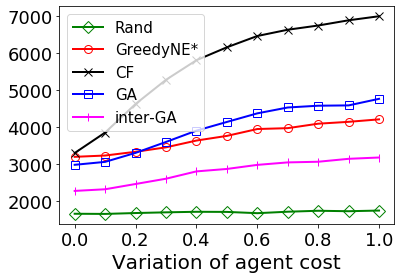

In [3]:
# utility
plt.figure()
x = result_agg['var']
y1 = result_agg['random_u']
plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

y3 = result_agg['GreedyNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_u']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_u']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

y7 = result_agg['int_GA_u']
plt.plot(x, y7, 'b-', linewidth=2, color='magenta', marker='|', fillstyle='none', markersize=8)

plt.legend(['Rand', 'GreedyNE*', 'CF', 'GA', 'inter-GA'], fontsize=15)
# plt.ylabel('utility', fontsize=20)
plt.xlabel('Variation of agent cost', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('v_u.pdf',bbox_inches='tight')


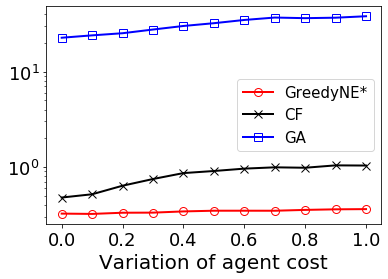

In [4]:
# time
plt.figure()

x = result_agg['var']
y3 = result_agg['GreedyNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_t']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_t']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

plt.legend(['GreedyNE*', 'CF', 'GA'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('time', fontsize=20)
plt.xlabel('Variation of agent cost', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('v_t.pdf',bbox_inches='tight')